# Mutation biases

So far, we have mostly used our evolutionary model as a proxy to study the structure a sequence-function relationship or a fitness landscape, but were not focused on how evolution would actually take place on that landscape in a specific case, where parameters like the population size and mutational biases are also relevant.

In this section, we will see how to incorporate different mutational biases to generate modified visualizations where some mutations are already expected to happen by chance more than others regardless of natural selection using the simple Serine codon landscape as in previous sections




In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt

import gpmap.src.plot as plot

from gpmap.src.space import SequenceSpace, CodonSpace
from gpmap.src.randwalk import WMWSWalk

Lets start by defining our discrete space with the `CodonSpace` object and the random walk under the weak mutation weak selection regime using `WMWSWalk` on it

In [2]:
space = CodonSpace(['S'], add_variation=True, seed=0)
rw = WMWSWalk(space)
print(space)

Sequence Space:
	Type: dna
	Sequence length: 3
	Number of alleles per site: [4, 4, 4]
	Genotypes: [AAA,AAC,AAG,...,TTC,TTG,TTT]
	Function y: [1.18,1.04,1.10,...,0.96,0.92,0.83]


Now we need to define the mutational model. For the overall markov chain to be time-reversible, the neutral dynamics also need to be time-reversible

$$\mu_{ij} \pi_i = \mu_{ji} \pi_j$$


While the use could direcly define a time-reversible mutation rate matrix for the whole set of states to incorporate complex mutational biases e.g. where mutation rates depend on neighboring sites, we provide an interface to generate site-independent mutational models very easily, parametrized in terms of the stationary frequencies $
\pi$ and the symmetric exchangeability rates as in [classic nucleotide substitution models](https://en.wikipedia.org/wiki/Substitution_model). We can also make some sites mutate faster than others.

### Specify common nucleotide substitution models

However, we provide an even simplified version that allows us to specify the specific substitution models for our neutral dynamics that generalize to all sites simultaneously. Lets specify a simple HKY85 model with different rates for transitions and transversions

In [3]:
exchange_rates = {'a':1, 'b': 2}
neutral_Q = rw.calc_model_neutral_rate_matrix('HKY85', exchange_rates=exchange_rates)

/grid/mccandlish/home_norepl/martigo/miniconda3/envs/gpmap/lib/python3.8/site-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


If we explore the possible values in the neutral rate matrix, we can basically see that there are only 3 different rates:

- Transition
- Transversion
- No change


In [4]:
print(np.unique(neutral_Q.data))

[-0.140625    0.01171875  0.0234375 ]


We can now specify the strength of selection and calculate the coordinates of the visualization as in previous cases

In [5]:
rw.calc_visualization(Ns=1)

In [6]:
nodes_df, edges_df = rw.nodes_df, rw.space.get_edges_df()
nodes_df.head()

,1,2,3,4,5,6,7,8,9,function,stationary_freq
AAA,4.129916,7.895254,-0.717798,-0.266106,3.379598,3.857859,-6.163346,-8.400122,-0.221005,1.176405,0.015625
AAC,7.417001,-1.032235,-0.087875,0.082241,-2.656594,5.746483,-1.178826,-5.505632,0.898723,1.040016,0.015625
AAG,3.914399,7.110884,-0.660251,-1.225834,3.236506,5.113392,3.836813,-8.469756,-0.851987,1.097874,0.015625
AAT,8.462299,-1.495280,-0.359653,-0.967117,6.036679,-1.001862,-0.278821,-6.536637,0.930354,1.224089,0.015625
ACA,-2.211338,4.762639,-7.121311,-1.604114,-0.430482,-0.394937,-6.356639,-3.575475,-4.166995,1.186756,0.015625


Lets calculate again the visualization coordinates under a uniform mutation model to compare how the visualization changes

In [7]:
rw.calc_model_neutral_rate_matrix('HKY85')
rw.calc_visualization(Ns=1)
nodes_df_unif, edges_df_unif = rw.nodes_df, rw.space.get_edges_df()

/grid/mccandlish/home_norepl/martigo/miniconda3/envs/gpmap/lib/python3.8/site-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


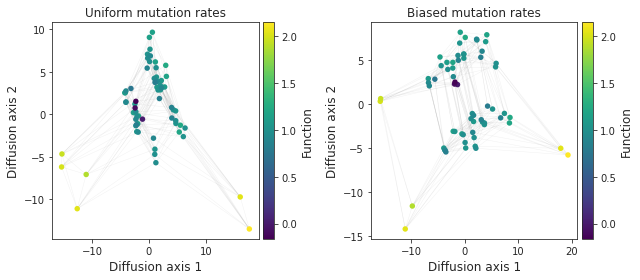

In [8]:
fig, subplots = plot.init_fig(1, 2, rowsize=4, colsize=4.5)
plot.plot_visualization(subplots[0], nodes_df_unif, edges_df=edges_df_unif, nodes_size=30)
subplots[0].set_title('Uniform mutation rates')
plot.plot_visualization(subplots[1], nodes_df, edges_df=edges_df, nodes_size=30)
subplots[1].set_title('Biased mutation rates')
fig.tight_layout()

We can clearly see that the landscape is deformed with respect to the model with uniform mutation rates. Indeed, we see how the set of 4 connected codons has be separated into to subclusters since now transversions are much less frequent, so the expected time to fix a transversion is longer, even between functional sequences

Lets now see how the visualizations change as we interpolate between a completely uniform model towards a transition/transversion biased mutational model

/grid/mccandlish/home_norepl/martigo/miniconda3/envs/gpmap/lib/python3.8/site-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
/grid/mccandlish/home_norepl/martigo/miniconda3/envs/gpmap/lib/python3.8/site-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
/grid/mccandlish/home_norepl/martigo/miniconda3/envs/gpmap/lib/python3.8/site-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
/grid/mccandlish/home_norepl/martigo/miniconda3/envs/gpmap/lib/python3.8/site-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil

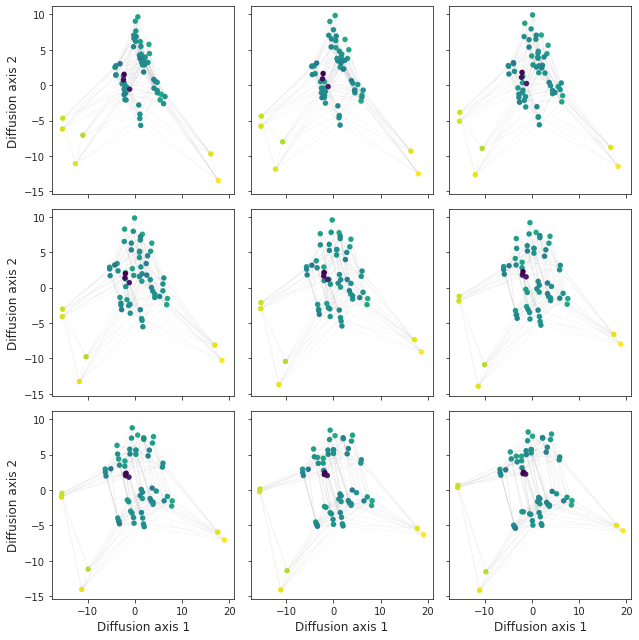

In [9]:
rows, cols = 3, 3
tot = rows * cols

a = 1
bs = np.linspace(1, 2, tot)
stat_freqs = {'A': 0.25, 'C': 0.25, 'G': 0.25, 'T': 0.25}


fig, subplots = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(9, 9))
subplots = subplots.flatten()

for i, (axes, b) in enumerate(zip(subplots, bs)):
    exchange_rates = {'a': a, 'b': b}
    neutral_Q = rw.calc_model_neutral_rate_matrix('HKY85', exchange_rates=exchange_rates, stat_freqs=stat_freqs)
    rw.calc_visualization(Ns=1)
    nodes_df, edges_df = rw.nodes_df, rw.space.get_edges_df()
    plot.plot_visualization(axes, nodes_df, edges_df=edges_df, nodes_size=30, cbar=False)
    if i % 3 != 0:
        axes.set_ylabel('')
    if i < 6:
        axes.set_xlabel('')
        
    
fig.tight_layout()

Lets now change only the neutral stationary frequencies in the time reversible model without modifying the exchangeability rates and see how the visualization is affected

In [18]:
stat_freqs = {'A': 0.15, 'C': 0.35, 'G': 0.35, 'T': 0.15}
neutral_Q = rw.calc_model_neutral_rate_matrix('HKY85', stat_freqs=stat_freqs)
rw.calc_visualization(Ns=1)

nodes_df, edges_df = rw.nodes_df, rw.space.get_edges_df()

/grid/mccandlish/home_norepl/martigo/miniconda3/envs/gpmap/lib/python3.8/site-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



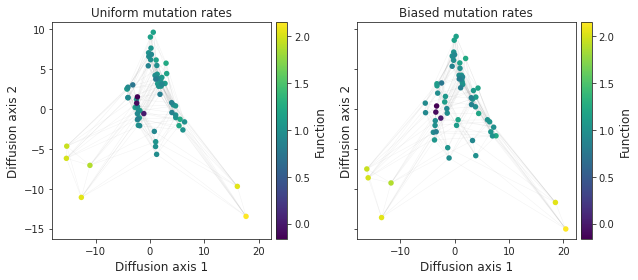

In [19]:
fig, subplots = plt.subplots(1, 2, figsize=(9, 4), sharey=True, sharex=True)
plot.plot_visualization(subplots[0], nodes_df_unif, edges_df=edges_df_unif, nodes_size=30)
subplots[0].set_title('Uniform mutation rates')
plot.plot_visualization(subplots[1], nodes_df, edges_df=edges_df, nodes_size=30)
subplots[1].set_title('Biased mutation rates')
fig.tight_layout()

We find only subtle variation in the visualization when compared to modification of the echangeability rates, which control most of the differences between the rates at which different mutations occur. But we can notice now that the 4 low-fitness intermediates that connect the 2 peaks no longer appear aligned, but are slighly separated in pairs towards the different peaks. Lets generate the interactive plot to explore which genotypes are those:



In [22]:
plot.plot_interactive(nodes_df, edges_df=edges_df, nodes_size=10)

By hovering over those gentoypes, we can now look at the path between the peaks TCC-TGC-AGC. The intermediate TGC appears closer to TCC because the C->G mutation rate is higher due to their high stationary frequencies. For the same reason, intermediate ACC is closer to AGC than to TCC.

### Specify a General Time-reversible model

So far, we have only specified a simple model where transitions are twice as likely as transversions to occur. However, we may want to use a more expressive model, such as the frequent C->T transitions, and very infrequent G->A, for instance . We can do so by just specifying all the exchangeability rates and specifying  `model='GTR'` option

In [55]:
exchange_rates = {'a': 1, 'b': 0.5, 'c': 1, 'd': 1, 'e': 2, 'f': 1}
neutral_Q = rw.calc_model_neutral_rate_matrix('GTR', exchange_rates=exchange_rates)
rw.calc_visualization(Ns=1)

nodes_df, edges_df = rw.nodes_df, rw.space.get_edges_df()
nodes_df['1'] = -nodes_df['1']

/grid/mccandlish/home_norepl/martigo/miniconda3/envs/gpmap/lib/python3.8/site-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



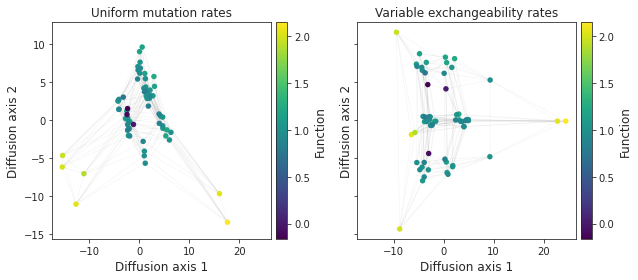

In [56]:
fig, subplots = plt.subplots(1, 2, figsize=(9, 4), sharey=True, sharex=True)
plot.plot_visualization(subplots[0], nodes_df_unif, edges_df=edges_df_unif, nodes_size=30)
subplots[0].set_title('Uniform mutation rates')
plot.plot_visualization(subplots[1], nodes_df, edges_df=edges_df, nodes_size=30)
subplots[1].set_title('Variable exchangeability rates')
fig.tight_layout()

We can see a big change from a quick look, since now one of the peaks has spread along diffusion axis 2 quite dramatically, increasing the expected number of times to evolve between a specific pair of genotypes within that peak, possibly the one encoding the least frequent mutation.

In [57]:
plot.plot_interactive(nodes_df, edges_df=edges_df, nodes_size=4, z='3')

Indeed, we can see that the two genotypes in the middle of the peak are separated by the very common C->T mutation, and the genotypes that are very separated along diffusion axis 2 are separated by a G->A mutation. Non functional sequences now appear separated from the functional ones along diffusion axis 3, suggesting that including these variable mutation rates increased the weight that functional sequences have in the variability in evolving times between genotypes

### Variable mutation rates across sites

We can also specify models that have different overall mutation rates for each of the sites. For instance, we can make the 3 nucleotide of the codon to generally take longer to mutate and see how expected times between sequences change 

In [35]:
site_mu = [2, 2, 1]
neutral_Q = rw.calc_neutral_rate_matrix(site_mut_rates=site_mu)
rw.calc_visualization(Ns=1)

nodes_df, edges_df = rw.nodes_df, rw.space.get_edges_df()

/grid/mccandlish/home_norepl/martigo/miniconda3/envs/gpmap/lib/python3.8/site-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



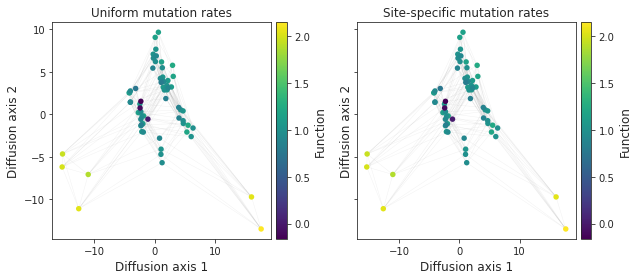

In [33]:
fig, subplots = plt.subplots(1, 2, figsize=(9, 4), sharey=True, sharex=True)
plot.plot_visualization(subplots[0], nodes_df_unif, edges_df=edges_df_unif, nodes_size=30)
subplots[0].set_title('Uniform mutation rates')
plot.plot_visualization(subplots[1], nodes_df, edges_df=edges_df, nodes_size=30)
subplots[1].set_title('Site-specific mutation rates')
fig.tight_layout()

In [34]:
print(np.unique(rw.neutral_rate_matrix.data))

[-0.140625  0.015625]
